# Electrical Networks

The analysis and design of large electrical networks has always been
conducted in the language of Linear Algebra. In fact, [Gustav Kirchhoff](https://en.wikipedia.org/wiki/Gustav_Kirchhoff),
the law-giver of electrical circuit theory, had a significant impact on
the creation of what we now call Linear Algebra.

We here develop his laws and algebra in the simple, but important, setting
of nerve conduction. We first construct a physical model 
of a neuron as a network of resistors and then build a mathematical model
to predict its response to current injection. We then extend both the physical
model and mathematical theory to encompass batteries and operational
amplifiers. In each case we arrive at a linear system of equations for the
internal (unknown) voltages and currents in terms of the known external
voltages and currents. We develop this linear system in a general four part
scheme known as a Strang Quartet after [Gilbert Strang](https://en.wikipedia.org/wiki/Gilbert_Strang)

## Neurons and the Strang Quartet

The human brain is an electrical network of 100 billion neurons.
A neuron is a spatially extended cell that, based upon inputs from its ten
thousand upstream neighbors, signals its downstream neighbors.
A neuron's spatial extent is typically idealized as simply a
cylinder of radius $a$ and length $\ell$ that conducts electricity both
along its length and across its lateral membrane. This ideal is nearly realized
in the squid giant axon illustrated in the video below.

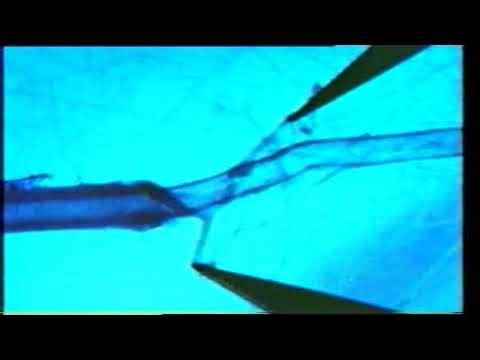

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("CXCGqwdtJ78", width=400)
#https://www.youtube.com/watch?v=CXCGqwdtJ78

\begin{myfig}\label{fig:axon} A brief tour of a giant axon of a squid. \end{myfig}

Though we shall, in 
subsequent chapters, delve more deeply into the biophysics, here, in our
first outing, we stick to its purely resistive properties. These
are expressed via two quantities: 
$\rho_i$, the resistivity, in $\Omega\,cm$, of the
cytoplasm that fills the cell, and $\rho_m$, the resistivity in 
$\Omega\,cm^2$ of the cell's lateral membrane. 
Here $\Omega$, the unit of resistance, is called an Ohm after [Georg Ohm](https://en.wikipedia.org/wiki/Georg_Ohm). 

Although current surely varies from point
to point along the neuron it is hoped that these variations are regular
enough to be captured by a multicompartment model. By that we mean that
we choose a number $N$ and divide the neuron into $N$ segments each of
length $\ell/N$. Denoting a segment's axial and membrane resistance by

\begin{equation*}
  R_i = \frac{\rho_i\ell/N}{\pi a^2} \and
  R_m = \frac{\rho_m}{2\pi a \ell/N} \nonumber
\end{equation*}

respectively, we arrive at the lumped circuit model of Figure \ref{fig:nrn0}.

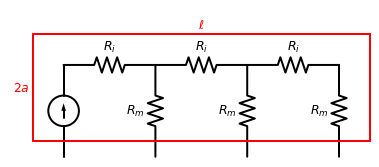

In [2]:
# a 3-compartment neuron model
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing()

d.add(elm.SOURCE_I, d='up')
R0 = d.add(elm.RES, d='right', label='$R_i$')
d.push()
R1 = d.add(elm.RES, label='$R_m$', d='down')
d.pop()
R2 = d.add(elm.RES, d='right', label='$R_i$')
d.push()
R3 = d.add(elm.RES, label='$R_m$', d='down')
d.pop()
R4 = d.add(elm.RES, d='right', label='$R_i$')
R5 = d.add(elm.RES, label='$R_m$', d='down')

T = d.add(elm.LINE, d='left', xy=(10,4), tox = R0.start-1, color='r', label='$\ell$')  # top
d.add(elm.LINE, d='down', toy = 0.5, color='r', label='$2a$')  # left
d.add(elm.LINE, d='right', tox = 10, color='r')  # bottom
RS = d.add(elm.LINE, d='up', toy = 4, color='r')  # right

d.draw()

\begin{myfig}\label{fig:nrn0} Cross section (red) of a cylindrical neuron of length $\ell$ and radius $a$, segmented into 3 compartments, each with axial resistance, $R_i$, and lateral resistance, $R_m$. The arrow at left signifies injection of current via an intracellular electrode. \end{myfig}

For a neuron in a dish
we may assume a constant extracellular potential, e.g., zero. We accomplish
this by grounding the extracellular nodes, see Figure \ref{fig:nrn1}.

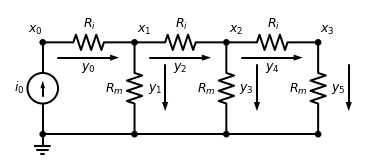

In [2]:
# full dress 3 compartment neuron
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    
    d += (i0 := elm.SourceI().up().label('$i_0$').dot())

    d += (Ri0 := elm.Resistor().right().label('$R_i$').dot().label('$x_0$', 'left', ofst = (0,0.4)).label('$x_1$', 'right', ofst = (0,0.4)))
    d += elm.CurrentLabel(top=False, ofst=0.5).at(Ri0).label('$y_0$')
    
    d.push()
    
    d += (Rm0 := elm.Resistor().down().label('$R_m$').dot())
    d += elm.CurrentLabel(top=True, ofst=1, length=1.5).at(Rm0).label('$y_1$').down()
    
    d.pop()
    
    d += (Ri1 := elm.Resistor().right().label('$R_i$').dot().label('$x_2$', 'right', ofst = (0,0.4)))
    d += elm.CurrentLabel(top=False, ofst=.5).at(Ri1).label('$y_2$')
    
    d.push()
    
    d += (Rm1 := elm.Resistor().down().label('$R_m$').dot())
    d += elm.CurrentLabel(top=True, ofst=1, length=1.5).at(Rm1).label('$y_3$').down()
    
    d.pop()
    
    d += (Ri2 := elm.Resistor().right().label('$R_i$').dot().label('$x_3$', 'right', ofst = (0,0.4)))
    d += elm.CurrentLabel(top=False, ofst=.5).at(Ri2).label('$y_4$')
    
    d.push()
    
    d += (Rm2 := elm.Resistor().down().label('$R_m$').dot())
    d += elm.CurrentLabel(top=True, ofst=1, length=1.5).at(Rm2).label('$y_5$').down()
    
    d += elm.Line().tox(i0.start).dot
    
    d += elm.Ground()

\begin{myfig}\label{fig:nrn1}The fully dressed circuit model.\end{myfig}

This figure also incorporates the exogenous disturbance, a current 
stimulus between ground and the left end of the neuron. Our immediate
goal is to
compute the resulting currents through each resistor and the potential
at each of the nodes. Our long-range goal is to provide a modeling
methodology that can be used across the engineering and science
disciplines. As an aid to computing the desired quantities we give them
names. With respect to Figure \ref{fig:nrn1} we label the vector of potentials

\begin{equation*}
  x = \begin{bmatrix}x_0\\ x_1\\ x_2\\ x_3\end{bmatrix}
  \hskip 0.25in \hbox{and vector of currents}\hskip 0.25in 
  y = \begin{bmatrix} y_0\\ y_1\\ y_2\\ y_3\\ y_4\end{bmatrix} \nonumber
\end{equation*}

We have also (arbitrarily) assigned directions to the currents as a
graphical aid in the consistent application of the basic circuit laws.


We incorporate the circuit laws in a modeling methodology that takes the form of
a *Strang Quartet*,


**(S1)** Express the voltage drops via 

\begin{equation}
e=-Ax \label{eq:S1}
\end{equation}

**(S2)** Express Ohm's Law via 

\begin{equation}
y=Ge\label{eq:S2}
\end{equation}

**(S3)** Express Kirchhoff's Current Law via 

\begin{equation}
A^Ty=-f\label{eq:S3}
\end{equation}

**(S4)** Combine the above into 

\begin{equation}
\boxed{A^TGAx=f}\label{eq:S4}
\end{equation}


The $A$ in (S1) is the node-edge incidence matrix - it encodes the
network's connectivity. \index{incidence matrix}
The $G$ in (S2) is the diagonal matrix of
edge conductances - it encodes the physics of the network. The $f$ in
(S3) is the vector of current sources - it encodes the network's
stimuli. The culminating $A^TGA$ in (S4) is the symmetric matrix whose
inverse, when applied to $f$, reveals the vector of potentials, $x$.
In order to make these ideas our own we must work many, many examples.

With respect to the circuit of \ref{fig:nrn1}, in accordance with step
(S1), we express the six potentials differences (always tail minus head)

\begin{equation*}
  \eqalign{e_0 &= x_0-x_1 \cr
  	   e_1 &= x_1 \cr
      	   e_2 &= x_1 - x_2 \cr
	   e_3 &= x_2 \cr
	   e_4 &= x_2 - x_3 \cr
	   e_6 &= x_3 \cr} \nonumber
\end{equation*}

Such long, tedious lists cry out for matrix representation, to wit

\begin{equation*}
  e = -Ax \where A = \begin{bmatrix}-1 & 1& 0& 0\cr
                              0 & -1 & 0 & 0 \cr
                              0 & -1 & 1 & 0 \cr
                              0 & 0 & -1 & 0 \cr
                              0 & 0 & -1 & 1 \cr
                              0 & 0 & 0 & -1 \end{bmatrix}, \nonumber
\end{equation*}

where the reason for the leading minus sign will be revealed 
in the next section.

Step (S2),  **Ohm's law**
states that the current along an edge is equal to
the potential drop across the edge divided by the resistance of the edge.
In our case,

\begin{equation*}
  y_j=e_j/R_i,\ j=0,2,4 \and y_j=e_j/R_m,\ j=1,3,5 \nonumber
\end{equation*}

or, in matrix notation,

\begin{equation*}
  y = Ge \where
  G = \begin{bmatrix}1/R_i & 0 & 0 & 0 & 0 & 0 \cr
               0 & 1/R_m & 0 & 0 & 0 & 0 \cr
               0 & 0 & 1/R_i & 0 & 0 & 0 \cr
               0 & 0 & 0 & 1/R_m & 0 & 0 \cr
               0 & 0 & 0 & 0 & 1/R_i & 0 \cr
               0 & 0 & 0 & 0 & 0 & 1/R_m \end{bmatrix}. \nonumber
\end{equation*}

Step (S3),  **Kirchhoff's Current Law**, states that the sum of 
the currents into each node must be zero. In our case
\index{Kirchhoff's Current Law}

\begin{equation*}
  \eqalign{i_0 - y_0 &= 0 \cr
           y_0 - y_1 - y_2 &=0 \cr
           y_2 - y_3 - y_4 &=0 \cr
           y_4 - y_5 &=0 \cr} \nonumber
\end{equation*}

or, in matrix terms

\begin{equation*}
  By = -f \where
  B = \begin{bmatrix}-1 & 0 & 0 & 0 & 0 & 0 \cr
                1 & -1 & -1 & 0 & 0 & 0 \cr
                0 & 0 & 1 & -1 & -1 & 0 \cr
                0 & 0 & 0 & 0 & 1 & -1 \end{bmatrix}
  \and
  f = \begin{bmatrix}i_0 \cr 0 \cr 0 \cr 0 \end{bmatrix} \nonumber
\end{equation*}

Turning back the page we recognize in $B$ the  **transpose** of $A$.
Calling it such, we recall our main steps

\begin{equation*}
   e = -Ax, \hskip 0.25in y = Ge, \and A^Ty = -f.  \nonumber
\end{equation*}

On substitution of the first two into the third we arrive, in
accordance with (S4), at

\begin{equation}
  \boxed{A^TGAx = f.} \label{eq:submod}
\end{equation}

This is a linear system of four simultaneous equations for the 4 unknown potentials, 
$x_0$ through
$x_3$. In the next chapter we will develop general methods for solvimng such systems. For now,
we simply invoke the canned *solve* routine in *numpy.linalg* and arrive at the
response depicted in Figure \ref{fig:cab1}.

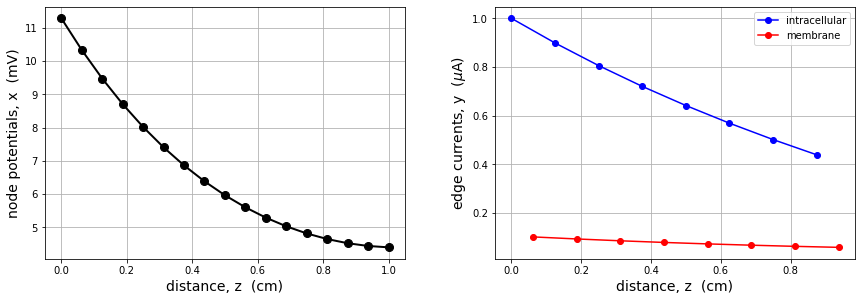

In [3]:
#  cab1.py, set up and solve the N-compartment cable problem
#  with current stimulus at the left end

import numpy as np    
import matplotlib.pyplot as plt 

fig, (ax1, ax2) = plt.subplots(1, 2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

N = 16      # number of compartments

ell = 1  # fiber length (cm)
a = 0.025    # fiber radius (cm)
rho_i = 30    # cytoplasmic resistivity (Ohm cm)
rho_m = 1000    # membrane resistivity (Ohm cm^2)
i_0 = .001    # current stimulus (mA)

R_i = rho_i*(ell/N)/(np.pi*a*a)    # axial resistance (Ohm)
R_m = rho_m/(2*np.pi*a*ell/N)      # lateral resistance (Ohm)

m = 2*N     # number of edges
n = N+1     # number of nodes

A = np.zeros((m,n))	# initialize incidence matrix

for j in range(N):  # build A one compartment (two rows) at a time
    A[2*j,j:j+2] = [-1, 1]
    A[2*j+1,j+1] = -1

G = np.zeros(m)	# initialize and assemble G
G[0:m:2] = 1/R_i
G[1:m:2] = 1/R_m
G = np.diag(G)

S = A.T @ G @ A   # assemble main matrix

f = np.zeros(n)	# assemble the stimulus vector
f[0] = i_0

x = np.linalg.solve(S,f)	# solve for the potentials

z = np.linspace(0,ell,N+1)	# nodal positions for plotting

ax1.plot(z,x,'k.-',linewidth=2,markersize=16)	# plot and label potential vs. distance
ax1.set_xlabel('distance, z  (cm)',fontsize=14)
ax1.set_ylabel('node potentials, x  (mV)',fontsize=14)
ax1.grid('on')

e = -A@x
y = 1000*G@e    # 1000 converts from milliamps to microamps
evens = np.arange(0,N,2)
odds = np.arange(1,N,2)
ax2.plot(z[evens], y[evens], 'bo-')
ax2.plot(z[odds], y[odds], 'ro-')
ax2.set_xlabel('distance, z  (cm)',fontsize=14)
ax2.set_ylabel('edge currents, y  ($\mu$A)',fontsize=14)
ax2.legend(['intracellular', 'membrane'])
ax2.grid('on');

\begin{myfig}\label{fig:cab1} Results of a 16 compartment 
neuronal simulation. The nodal voltages and edge currents as functions of distance from the
left end, computed from \ref{eq:submod} with $i_0=0.001\ mA$ (milliAmperes).\end{myfig}

Once the structure of the constituents in the fundamental system \ref{eq:submod}
is determined it is an easy matter to implement it, as we have done in
the code cell above, for an arbitrary number of compartments. In Figure \ref{fig:cab1}
we see that the stimulus at the neuron's left end produces a depolarization there
that then attenuates with distance from the site of stimulation.

\begin{exercise}\label{ex:atgaexp}  In order to refresh your matrix-vector multiply 
skills please calculate, by hand, the product $A^TGA$ in the 3 compartment case and
write out the 4 equations in \ref{eq:submod}. The second equation should read

\begin{equation}
  (-x_1+2x_2-x_3)/R_i + x_2/R_m = 0. \label{eq:compeq}
\end{equation}

\end{exercise}  

\begin{exercise}\label{ex:fork} Neurons are rarely straight. Instead, to maximize their
contact with neighbors they branch, as in the fork of Figure \ref{fig:fork}.
Derive the associated node-edge incidence matrix.
\end{exercise}

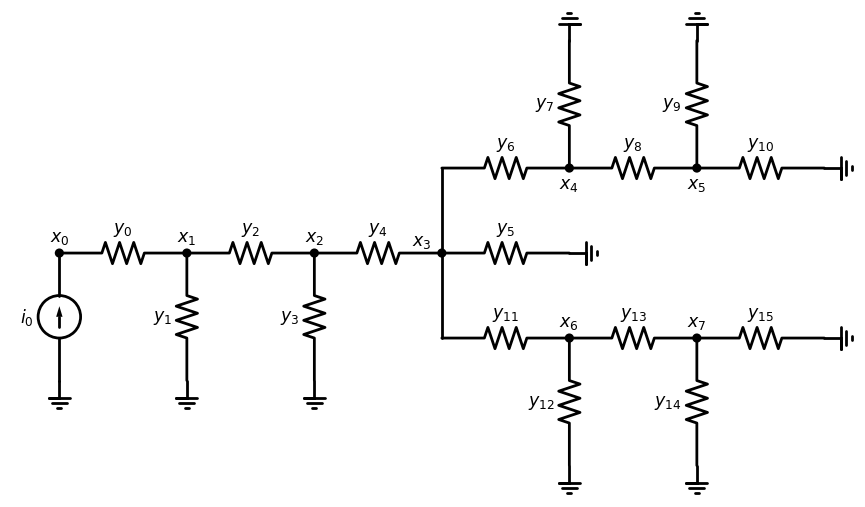

In [1]:
# forked neuron

import schemdraw
import schemdraw.elements as elm

d = schemdraw.Drawing()

R0 = d.add(elm.RES, label='$y_0$')
node = d.add(elm.DOT)
node.add_label('$x_1$',loc = 'top') 
d.push()
R1 = d.add(elm.RES, label='$y_1$', d='down')
d.add(elm.GND)

d.pop()
R2 = d.add(elm.RES, label='$y_2$')
node = d.add(elm.DOT)
node.add_label('$x_2$',loc = 'top') 
d.push()
R3 = d.add(elm.RES, label='$y_3$', d='down')
d.add(elm.GND)

d.pop()
R4 = d.add(elm.RES, label='$y_4$')
fnode = d.add(elm.DOT)
d.push()
fnode.add_label('$x_3$',loc = 'center', ofst = (-0.25,0.5) )
R5 = d.add(elm.RES, label='$y_5$')
d.add(elm.GND,d='up')

d.pop()
d.add(elm.LINE, d='up', l=2)
R6 = d.add(elm.RES, label='$y_6$', d='right')
d.push()
node = d.add(elm.DOT)
node.add_label('$x_4$',loc = 'bot') 
R7 = d.add(elm.RES, label='$y_7$', d='up')
d.add(elm.GND,d='left')

d.pop()
R8 = d.add(elm.RES, label='$y_8$', d='right')
node = d.add(elm.DOT)
node.add_label('$x_5$',loc = 'bot') 
d.push()
R9 = d.add(elm.RES, label='$y_9$', d='up')
d.add(elm.GND,d='left')

d.pop()
R10 = d.add(elm.RES, label='$y_{10}$', d='right')
d.add(elm.GND,d='up')

d.add(elm.LINE, d='down', xy = fnode.start, l=2)   # return to fnode and draw down

R11 = d.add(elm.RES, label='$y_{11}$', d='right')
d.push()
node = d.add(elm.DOT)
node.add_label('$x_6$',loc = 'top') 
R12 = d.add(elm.RES, label='$y_{12}$', d='down')
d.add(elm.GND)

d.pop()
R13 = d.add(elm.RES, label='$y_{13}$', d='right')
node = d.add(elm.DOT)
node.add_label('$x_7$',loc = 'top') 
d.push()
R14 = d.add(elm.RES, label='$y_{14}$', d='down')
d.add(elm.GND)

d.pop()
R15 = d.add(elm.RES, label='$y_{15}$', d='right')
d.add(elm.GND,d='up')

d.add(elm.SOURCE_I, d='down', xy = R0.start, reverse=True, label='$i_0$')
d.add(elm.GND)
node = d.add(elm.DOT, xy=R0.start)
node.add_label('$x_0$',loc = 'top' )

d.draw()


\begin{myfig}\label{fig:fork} A compartmental model of a forked neuron. In order to
reduce clutter we have neglected to orient the edges. To derive the incidence matrix
please use rightward pointing arrows on the axial resistances and ground pointing arrows
on the membrane conductances.\end{myfig}

## Resistor Nets with Current Sources and Batteries

We have seen in the previous section 
how a current source may produce
a potential difference across a neuron's membrane. We note that,
even in the absence of electrical stimuli, there is always a difference
in potential between the inside and outside of a living cell. In fact,
this difference is one of the biologist's definition of "living." Life
is maintained by the fact that the neuron's interior is rich (relative to the
cell's exterior) in potassium ions and poor in sodium and chloride ions.
These concentration differences
establish a resting potential difference, $E_m$, across the cell's
lateral membrane. The modified circuit diagram is given in Figure \ref{fig:nrn2}.

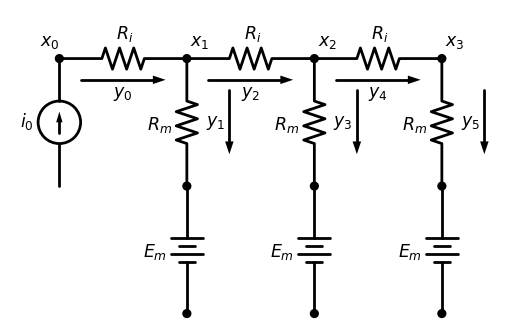

AttributeError: 'function' object has no attribute '_place'

In [8]:
# full dress 3 compartment neuron

import matplotlib.pyplot as plt   
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    
    d += (i0 := elm.SourceI().up().label('$i_0$').dot())

    d += (Ri0 := elm.Resistor().right().label('$R_i$').dot().label('$x_0$', 'left', ofst = (0,0.4)).label('$x_1$', 'right', ofst = (0,0.4)))
    d += elm.CurrentLabel(top=False, ofst=0.5).at(Ri0).label('$y_0$')
    
    d.push()
    
    d += (Rm0 := elm.Resistor().down().label('$R_m$').dot())
    d += elm.CurrentLabel(top=True, ofst=1, length=1.5).at(Rm0).label('$y_1$').down()
    d += elm.Battery(label='$E_m$').down().dot()
    
    d.pop()
    
    d += (Ri1 := elm.Resistor().right().label('$R_i$').dot().label('$x_2$', 'right', ofst = (0,0.4)))
    d += elm.CurrentLabel(top=False, ofst=.5).at(Ri1).label('$y_2$')
    
    d.push()
    
    d += (Rm1 := elm.Resistor().down().label('$R_m$').dot())
    d += elm.CurrentLabel(top=True, ofst=1, length=1.5).at(Rm1).label('$y_3$').down()
    d += elm.Battery(label='$E_m$').down().dot()
    
    d.pop()
    
    d += (Ri2 := elm.Resistor().right().label('$R_i$').dot().label('$x_3$', 'right', ofst = (0,0.4)))
    d += elm.CurrentLabel(top=False, ofst=.5).at(Ri2).label('$y_4$')
    
    d.push()
    
    d += (Rm2 := elm.Resistor().down().label('$R_m$').dot())
    d += elm.CurrentLabel(top=True, ofst=1, length=1.5).at(Rm2).label('$y_5$').down()
    d += elm.Battery(label='$E_m$').down().dot()
    
    d += elm.Line().tox(i0.start).dot
    
    d.push()
    
    d += elm.Line().toy(i0.start)
    
    d.pop()
    
    d += elm.Ground()

\begin{myfig}\label{fig:nrn2}Circuit model with batteries associated with the rest potential.\end{myfig}

The convention is that the potential difference across the battery is $E_m$.
As the bottom terminal of each battery is grounded it follows that the potential
at the top of each battery is $E_m$.
Revisiting steps (S1-4) of the Strang Quartet we note that in (S1) the even numbered
voltage drops are now

\begin{equation*}
  e_2 = x_2 - E_m,\hskip 0.25in e_4 = x_3 - E_m \and e_6 = x_4 - E_m.
\end{equation*}

We accommodate such things by generalizing (S1) to

**(S1')** Express the voltage drops as $e=b-Ax$ where $b$ is the
vector that encodes the batteries.

No changes are necessary for (S2) and (S3). The final step now reads,

**(S4')** Combine (S1'), (S2) and (S3) to produce
 
\begin{equation}
 \boxed{ A^TGAx=A^TGb+f.} \label{eq:submod2}
\end{equation}

This is  **the general** form for a resistor network driven by current sources
and batteries.

Returning to Figure \ref{fig:nrn2} we note that

\begin{equation*}
  b = -E_m[0\ 1\ 0\ 1\ 0\ 1]^T \and
  A^TGb = (E_m/R_m)[0\ 1\ 1\ 1]^T.
\end{equation*}

To build and solve (\ref{eq:submod2}) requires only minor changes to our previous code cell. 

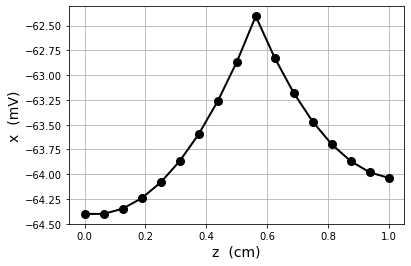

In [6]:
#  cab2.py, set up and solve the N-compartment cable problem
#  with current stimulus at the left end and leak potential E_m

import numpy as np    
import matplotlib.pyplot as plt 

N = 16      # number of compartments

ell = 1	# fiber length (cm)
a = 0.025	# fiber radius (cm)
rho_i = 30	# cytoplasmic resistivity (Ohm cm)
rho_m = 1000	# membrane resistivity (Ohm cm^2)
i_0 = .001	# current stimulus (mA)
E_m = -70   # leak potential (mV)

R_i = rho_i*(ell/N)/(np.pi*a*a)  	# axial resistance (Ohm)
R_m = rho_m/(2*np.pi*a*ell/N)	# lateral resistance (Ohm)

m = 2*N	# number of edges
n = N+1	# number of nodes

A = np.zeros((m,n))	# initialize incidence matrix

for j in range(N):  # build A one compartment (two rows) at a time
    A[2*j,j:j+2] = [-1, 1]
    A[2*j+1,j+1] = -1

G = np.zeros(m)	# initialize and assemble G
G[0:m:2] = 1/R_i
G[1:m:2] = 1/R_m
G = np.diag(G)

S = np.matmul(A.T,np.matmul(G,A))	# assemble main matrix

f = np.zeros(n)	# assemble the stimulus vector
f[9] = i_0
 
b = np.zeros(m)     # build the battery vector
b[1:m:2] = -E_m
f = f + np.matmul(A.T,np.matmul(G,b))  # add battery components to stimulus

x = np.linalg.solve(S,f)	# solve for the potentials

z = np.linspace(0,ell,N+1)	# nodal positions for plotting

plt.plot(z,x,'k.-',linewidth=2, markersize=16)	# plot and label potential vs. distance
plt.xlabel('z  (cm)', fontsize=14)
plt.ylabel('x  (mV)', fontsize=14)
plt.grid('on')

\begin{myfig}\label{fig:cab2}Results of a 16 compartment simulation with batteries,
$E_m=-70\ mV$, and a $1\ \mu A$ stimulus just past the half way mark. \end{myfig}

\begin{exercise}\label{ex:wbridge} The circuit depicted in Figure \label{fig:bridge} is known as a **Wheatstone
Bridge**

 (a) Carefully derive the equilibrium equations for the potentials $x_0$ and $x_1$.

 (b) Solve the equations in (a) for
 
\begin{equation*}
  x_0 = V_0/2 \and x_1 = V_0\frac{R}{R+R_2}.
\end{equation*}

 (c) If $V\equiv x_0-x_1$ is now the voltage output of the bridge, show that it
varies from $-V_0/2$ to $V_0/2$ as $R_2$ climbs from $0$ to $\infty$. 
\end{exercise}

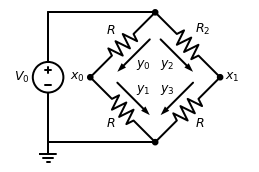

In [7]:
# draw wheatstone bridge

import schemdraw
import schemdraw.elements as elm

d = schemdraw.Drawing()

R0 = d.add(elm.RES, label='$R$', theta = 45)
d.add(elm.DOT)
#d.labelI(R0, label='$y_0$', arrowofst=0.5, arrowlen=1.5, top=False, reverse = True)
d.add(elm.CurrentLabel(top=False, ofst=0.5,reverse = True,length=1.5 ).at(R0).label('$y_0$'))
R1 = d.add(elm.RES, label='$R_2$', theta = -45)
#d.labelI(R1, label='$y_2$', arrowofst=0.5, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5,length=1.5 ).at(R1).label('$y_2$'))
node = d.add(elm.DOT)
node.add_label('$x_1$',loc = 'rgt')
R2 = d.add(elm.RES, botlabel='$R$', theta = -135)
#d.labelI(R2, label='$y_3$', arrowofst=-0.5, arrowlen=1.5, top=True)
d.add(elm.CurrentLabel(ofst=0.5, reverse=True,length=1.5 ).at(R2).label('$y_3$'))
d.add(elm.DOT)
R3 = d.add(elm.RES, botlabel='$R$', theta = 135)
#d.labelI(R3, label='$y_1$', arrowofst=-0.5, arrowlen=1.5, top=True, reverse = True)
d.add(elm.CurrentLabel(ofst=0.5,length=1.5).at(R3).label('$y_1$'))
node = d.add(elm.DOT)
node.add_label('$x_0$',loc = 'lft')

d.add(elm.LINE, d='left', xy = R3.start, l=3.5)
d.add(elm.GND)
d.add(elm.SOURCE_V, d='up', toy = R1.start, label='$V_0$')
d.add(elm.LINE, d='right', l=3.5)

d.draw()

\begin{myfig}\label{fig:bridge} A wheatstone bridge. As we vary the odd resistance, $R_2$,
we will arrive at a variable output voltage, $x_0-x_1$. \end{myfig}

## Operational Amplifiers

The true work horse of analog circuitry is the operational amplifier, or
op-amp for short. It is an ingenious blend of nonlinear circuit elements
(transistors) that yields straightforward linear combinations of its
inputs. As resistor nets dissipate energy opamps actually increase energy.
More precisely, they transmit energy to the circuit - for they are 
active devices that require (like neurons) their own energy source. 
The opamp symbol
and a standard configuration are illustrated in Figure \ref{fig:opamp}

In [6]:
# non-inverting amplifier   
import schemdraw
import schemdraw.elements as elm

d = schemdraw.Drawing()

op = d.add(elm.Opamp(leads=True))
d.add(elm.Line, xy=op.out, l=.75)
d.add(elm.LINE, xy=op.in1, d='left', l=.75)
d.add(elm.LINE, d='up', l=1.5)
node = d.add(elm.DOT)
node.add_label('$x_0$')
R0 = d.add(elm.RES, d='left', label='$R_0$')
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R0).label('$y_0$'))

R1 = d.add(elm.RES, d='right', xy=R0.start, tox=op.out+.5, label='$R_1$')
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R1).label('$y_1$'))
d.add(elm.LINE, d='down', toy=op.out)
node = dot = d.add(elm.DOT)
node.add_label('$x_1$', loc='bot')

d.add(elm.LINE, d='left', xy=op.in2, l=.75)
d.add(elm.SOURCE_V, d='left', reverse=True, label='$v_{in}$')
d.add(elm.GND)
d.add(elm.LINE, d='up', toy = R0.start)

d.draw()

TypeError: add() got an unexpected keyword argument 'xy'

\begin{myfig}\label{fig:opamp}An operational amplifier has two input terminals,
labeled $\pm$, and one output terminal.  This circuit, called the 
"noniverting amplifier," magnifies its input by the factor
$(1+R_1/R_0)$. See \ref{eq:Gnoninv}. \end{myfig}

The laws that govern the operation of opamps are

 **(OA1)** The potentials at the two input terminals coincide, i.e., are equal
to one another.

 **(OA2)** The current entering the opamp at each input terminal is zero.

We now illustrate these laws in small and large networks. Starting with
Figure \ref{fig:opamp} (OA1) dictates that $x_0=V_{in}$ while (OA2) that $y_0=y_1$.
Together these two state that

\begin{equation*}
  \frac{0-V_{in}}{R_0} = \frac{V_{in}-x_1}{R_1}
\end{equation*}

and so

\begin{equation}
  \boxed{x_1 = (1+R_1/R_0)V_{in}.}   \label{eq:Gnoninv}
\end{equation}

This result causes us to speak of $(1+R_1/R_0)$ as the  **gain** of circuit in
Figure \ref{fig:opamp}. 

In order to extend our analysis to larger circuits
we need to reflect both on what we did and what we did not do en route to
(\ref{eq:Gnoninv}). What we did was to invoke the opamp rules (OA1) and
(OA2). What we did not do was to balance current at the output
terminal, for  an opamp (being a powered device) does not conserve current
between its input and output terminals. It is worth stating this:

**(OA3)** Do not apply KCL at the output terminal of any opamp.

Fortunately these rules do balance in the mathematical sense. That is,
though they modify one step of the Strang Quartet they still lead to a
consistent set of equations for all unknown potentials. To illustrate this
we consider the differential amplifier of Figure \ref{fig:diffamp}.

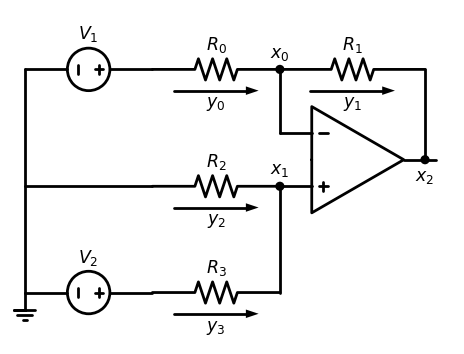

In [2]:
# differential amplifier

import schemdraw
import schemdraw.elements as elm

d = schemdraw.Drawing()

op = d.add(elm.OPAMP)
d.add(elm.LINE, xy=op.out, l=.75)
d.add(elm.LINE, xy=op.in1, d='left', l=.75)
d.add(elm.LINE, d='up', l=1.5)
node = d.add(elm.DOT)
node.add_label('$x_0$')
R0 = d.add(elm.RES, d='left', label='$R_0$')
#d.labelI(R0, label='$y_0$', arrowofst=-0.5, reverse=True, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R0).label('$y_0$'))
V1 = d.add(elm.SOURCE_V, d='left', reverse=True, label='$V_1$')

R1 = d.add(elm.RES, d='right', xy=R0.start, tox=op.out+.5, label='$R_1$')
#d.labelI(R1, label='$y_1$', arrowofst=0.5, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R1).label('$y_1$'))
d.add(elm.LINE, d='down', toy=op.out)
node = dot = d.add(elm.DOT)
node.add_label('$x_2$', loc='bot')

d.add(elm.LINE, d='left', xy=op.in2, l=.75)
d.push()
node = d.add(elm.DOT)
node.add_label('$x_1$', loc='top')
R2 = d.add(elm.RES, d='left', label='$R_2$')
#d.labelI(R2, label='$y_2$', arrowofst=-0.5, reverse = True, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R2).label('$y_2$'))
d.add(elm.LINE, tox = V1.end)

d.pop()
d.add(elm.LINE, d='down', l=2.5)

R3 = d.add(elm.RES, d='left', label='$R_3$')
#d.labelI(R3, label='$y_3$', arrowofst=-0.5, reverse = True, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R3).label('$y_3$'))
V_2 = d.add(elm.SOURCE_V, d='left', reverse=True, label='$V_2$')
d.add(elm.GND)
d.add(elm.LINE, d='up', toy = V1.start)

d.draw()

\begin{myfig}\label{fig:diffamp} A differential amplifier. That is, a circuit
that amplifies the difference $V_1-V_2$.\end{myfig}

Regarding the circuit of Figure \ref{fig:diffamp}, following (OA1) we have
labeled both input terminals with the same unknown potential. The Strang
Quartet begins, as usual, by expressing the voltage drops

\begin{equation*}
  \eqalign{e_0 &= V_2-x_0 \cr 
           e_1 &= x_0-x_1 \cr 
           e_2 &= V_1-x_0 \cr 
           e_3 &= 0-x_0 \cr} 
    \hskip 0.25in \hbox{as}\hskip 0.25in  e = b - Ax, \where 
   b = \begin{bmatrix} V_2 \\ 0 \\ V_1 \\ 0 \end{bmatrix} 
 \and
 A = \begin{bmatrix} 1 & 0 \cr -1 & 1 \cr 1 & 0 \cr 1 & 0 \end{bmatrix}. 
\end{equation*}


The next step, $y=Ge$, also proceeds, as before, with
$G=\diag(G_0,G_1,G_2,G_3)$ where $G_j\equiv 1/R_j$. 
Unlike the standard step of current 
balance we ignore the output terminal and yet balance currents at both input
terminals even though their potentials are identical. In particular, 
current balance now takes the form

\begin{equation*}
  \eqalign{y_2+y_3 &= 0 \cr y_0-y_1 &= 0 \cr} \hskip 0.25in \hbox{i.e.,}\hskip 0.25in 
  By = 0 \where 
  B = \begin{bmatrix} 0 & 0 & 1 & 1 \\ 1 & -1 & 0 & 0 \end{bmatrix}.
\end{equation*}


We note at once that $B\ne A^T$ but proceed to unpack $By=0$ to
$BGe=0$ and then $BG(b-Ax)$, i.e., 

\begin{equation}
  \boxed{BGAx = BGb.}  \label{eq:opampsys}
\end{equation} 

In the case of Figure \ref{fig:diffamp} we find

\begin{equation*}
  BGA = \begin{bmatrix} G_2+G_3 & 0 \\ G_0+G_1 & -G_1 \end{bmatrix}
  \and BGb = \begin{bmatrix} G_2V_1 \\ G_0V_2 \end{bmatrix}.
\end{equation*}

We can read off the solution to this triangular system

\begin{equation}
  x_0 = \frac{G_2}{G_2+G_3}V_1 \and
  x_1 = (1+G_0/G_1)x_1 - (G_0/G_1)V_2.  \label{eq:diffamp0}
\end{equation}

It follows that $x_1$ is a weighted difference of the two input voltages.
We can simplify the algebra on choosing $R_0=R_2$ and $R_1=R_3=\Gamma R_0$,
for then \ref{eq:diffamp0} yields

\begin{equation}
  \boxed{x_1 = \Gamma(V_1-V_2),} \label{eq:diffamp1}
\end{equation}

and we recognize Figure \ref{fig:diffamp} as a  **differential amplifier**
with gain $\Gamma$.

Figure. Apparent convergence of the cable response as
the number of compartments grows.

\begin{exercise}\label{ex:instampexe} The Instrumentation Amplifier of 
Figure \ref{fig:Iamp} is an improvement over the differential amplifier

Construct and solve (\ref{eq:opampsys}) and conclude that

\begin{equation*}
  x_3 = (1+2R_2/R_3)(V_2-V_1).
\end{equation*}

\end{exercise}

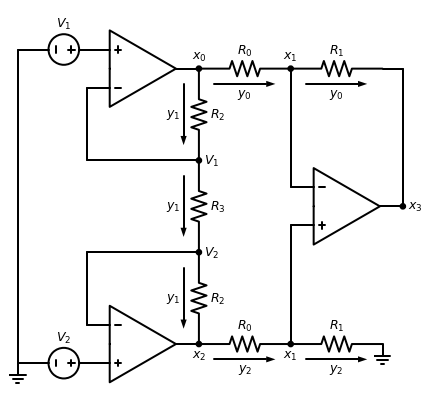

In [10]:
# instrumentation amplifier
import schemdraw
import schemdraw.elements as elm

d = schemdraw.Drawing()

op1 = d.add(elm.OPAMP, flip = True)
V1 = d.add(elm.SOURCE_V, d='left', xy = op1.in2, reverse=True, label='$V_1$')
Tstub = d.add(elm.LINE, xy=op1.in1, l=.75, d='left')
d.add(elm.LINE, xy=op1.out, l=.75, d='right')

node = d.add(elm.DOT)
node.add_label('$x_0$')
R0 = d.add(elm.RES, d='right', label='$R_0$')
#d.labelI(R0, label='$y_0$', arrowofst=0.5, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R0).label('$y_0$'))

x1 = node = d.add(elm.DOT)
node.add_label('$x_1$')
R1 = d.add(elm.RES, d='right', label='$R_1$')
#d.labelI(R1, label='$y_0$', arrowofst=0.5, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R1).label('$y_0$'))

R2 = d.add(elm.RES, d='down', xy = R0.start, botlabel='$R_2$')
#d.labelI(R2, label='$y_1$', arrowofst=-0.5, arrowlen=1.5, top=True)
d.add(elm.CurrentLabel(top=True, ofst=0.5, reverse=True).at(R2).label('$y_1$'))
V1n = node = d.add(elm.DOT)
node.add_label('$V_1$', loc = 'rgt')

d.add(elm.LINE, d='left', tox = Tstub.end)
UPL = d.add(elm.LINE, d='up', toy = Tstub.end)

R3 = d.add(elm.RES, d='down', xy = V1n.start, botlabel='$R_3$')
#d.labelI(R3, label='$y_1$', arrowofst=-0.5, arrowlen=1.5, top=True)
d.add(elm.CurrentLabel(top=True, ofst=0.5, reverse=True).at(R3).label('$y_1$'))
V2n = node = d.add(elm.DOT)
node.add_label('$V_2$', loc = 'rgt')

R4 = d.add(elm.RES, d='down', xy = R3.end, botlabel='$R_2$')
#d.labelI(R4, label='$y_1$', arrowofst=-0.5, arrowlen=1.5, top=True)
d.add(elm.CurrentLabel(top=True, ofst=0.5, reverse=True).at(R4).label('$y_1$'))
x3 = node = d.add(elm.DOT)
node.add_label('$x_2$', loc = 'bot')
LN = d.add(elm.LINE, l=.75, d='left')
#op2 = d.add(elm.OPAMP, xy=[op1.end[0]+0.3,LN.end[1]], reverse=True, flip=True)
op2 = d.add(elm.OPAMP, xy=[op1.out[0],LN.end[1]], reverse=True, flip=True)

d.add(elm.LINE, d='left', xy = V2n.start, tox = Tstub.end)
d.add(elm.LINE, d='down', toy = op2.in1)
d.add(elm.LINE, d='right', tox = op2.in1)

V2 = d.add(elm.SOURCE_V, d='left', xy = op2.in2, reverse=True, label='$V_2$')
d.add(elm.GND)
d.add(elm.LINE, d='up', toy = V1.end)

R5 = d.add(elm.RES, xy=x3.start, d='right', label='$R_0$')
#d.labelI(R5, label='$y_2$', arrowofst=0.5, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R5).label('$y_2$'))

x4 = d.add(elm.DOT)
x4.add_label('$x_1$', loc = 'bot')
R6 = d.add(elm.RES, d='right', label='$R_1$')
#d.labelI(R6, label='$y_2$', arrowofst=0.5, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R6).label('$y_2$'))
d.add(elm.GND)

op3 = d.add(elm.OPAMP, xy=[op1.out[0]+4.5,(op1.out[1]+op2.out[1])/2.0]) #, reverse=True, flip=True)

d.add(elm.LINE, d='down', xy = x1.start, toy = op3.in1)
d.add(elm.LINE, d='right', tox = op3.in1)

d.add(elm.LINE, d='up', xy = x4.start, toy = op3.in2)
d.add(elm.LINE, d='right', tox = op3.in2)

d.add(elm.LINE, d='right', xy = op3.out, l=0.75)
x5 = d.add(elm.DOT)
x5.add_label('$x_3$', loc = 'rgt')
d.add(elm.LINE, d='up', toy = R1.end)
d.add(elm.LINE, d='left', tox = R1.end)

d.draw()

\begin{myfig}\label{fig:Iamp} An Instrumentation Amplifier. \end{myfig}

\begin{exercise}\label{ex:summer} The circuit of Figure \ref{fig:summer} is deemed a
summer. Construct and solve (\ref{eq:opampsys}) and conclude that

\begin{equation*}
  x_1 = \sum_{j=0}^3\gamma_jV_j \where
   \gamma_j = \frac{1+G_5/G_6}{G_0+G_1+G_2+G_3+G_4}G_j.
\end{equation*} 

\end{exercise}

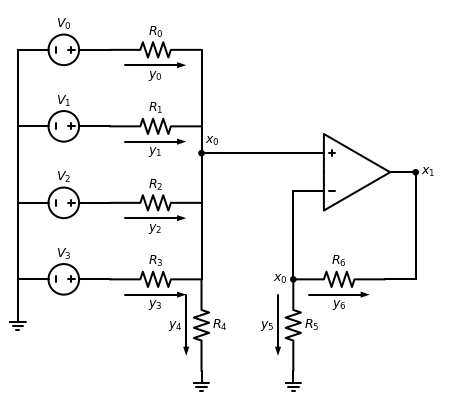

In [11]:
# summer, a circuit that sums
import schemdraw
import schemdraw.elements as elm

d = schemdraw.Drawing()

V1 = d.add(elm.SOURCE_V, d='right', label='$V_0$')
R0 = d.add(elm.RES, d='right', label='$R_0$')
#d.labelI(R0, label='$y_0$', arrowofst=0.5, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R0).label('$y_0$'))


V2 = d.add(elm.SOURCE_V, xy = [V1.start[0], V1.start[1]-2.5], d='right', label='$V_1$')
R1 = d.add(elm.RES, d='right', label='$R_1$')
#d.labelI(R1, label='$y_1$', arrowofst=0.5, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R1).label('$y_1$'))

V3 = d.add(elm.SOURCE_V, xy = [V2.start[0], V2.start[1]-2.5], d='right', label='$V_2$')
R2 = d.add(elm.RES, d='right', label='$R_2$')
#d.labelI(R2, label='$y_2$', arrowofst=0.5, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R2).label('$y_2$'))

V4 = d.add(elm.SOURCE_V, xy = [V3.start[0], V3.start[1]-2.5], d='right', label='$V_3$')
R3 = d.add(elm.RES, d='right', label='$R_3$')
#d.labelI(R3, label='$y_3$', arrowofst=0.5, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R3).label('$y_3$'))

d.add(elm.LINE, xy=V1.start, toy = V4.start - 1, d='down')
d.add(elm.GND)

d.add(elm.LINE, xy=R0.end, toy = V4.start, d='down')
R4 = d.add(elm.RES, d='down', botlabel='$R_4$')
#d.labelI(R4, label='$y_4$', arrowofst=-0.5, arrowlen=1.5, top=True)
d.add(elm.CurrentLabel(top=True, ofst=0.5, reverse=True).at(R4).label('$y_4$'))
d.add(elm.GND)

op = d.add(elm.OPAMP, flip = True, xy = [R2.end[0]+4, R2.end[1]+1], theta = 0)
d.add(elm.LINE, xy=op.in2, l = 4, d='left')
node = d.add(elm.DOT)
node.add_label('$x_0$', loc = 'center', ofst=(.6,.6))

d.add(elm.LINE, xy=op.in1, l = 1, d='left')
d.add(elm.LINE,  toy = R3.end, d='down')
d.push()
R5 = d.add(elm.RES, d='down', botlabel='$R_5$')
#d.labelI(R5, label='$y_5$', arrowofst=-0.5, arrowlen=1.5, top=True)
d.add(elm.CurrentLabel(top=True, ofst=0.5, reverse=True).at(R5).label('$y_5$'))
d.add(elm.GND)

d.pop()
node = d.add(elm.DOT)
node.add_label('$x_0$', loc = 'lft')
R6 = d.add(elm.RES, d='right', label='$R_6$')
#d.labelI(R6, label='$y_6$', arrowofst=0.5, arrowlen=1.5, top=False)
d.add(elm.CurrentLabel(top=False, ofst=0.5).at(R6).label('$y_6$'))
d.add(elm.LINE,  l=1, d='right')
d.add(elm.LINE,  toy = op.out, d='up')
node = d.add(elm.DOT)
node.add_label('$x_1$', loc = 'rgt')
d.add(elm.LINE,  tox = op.out, d='left')

d.draw()


\begin{myfig}\label{fig:summer} A circuit that produces a weighted sum of its inputs. \end{myfig}

\begin{exercise}\label{ex:matviaopamp} Note that our Summer and Differential Amplifier
circuits are actually computing inner products of their inputs. As matrix
vector multiplication is nothing more than a vector of inner products, we
may now design circuits to implement matrix multiplication.
Please combine two differential amplifiers to arrive at a circuit that
performs $x=SV$ where

\begin{equation*}
  S = \begin{bmatrix}2 & -1 \\ -1 & 2 \end{bmatrix} \and V =
      \begin{bmatrix}V_1 \\ V_2 \end{bmatrix}.
\end{equation*}

Draw the circuit and specify all resistances.
\end{exercise}